In [3]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np
from time import time

In [4]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),])
trainset = dsets.MNIST(root='./../data', 
                            train=True, 
                            download=True, 
                            transform=transform)
valset = dsets.MNIST(root='./../data', 
                            train=True, 
                            download=True, 
                            transform=transform)

In [5]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(28, 28), cmap='gray')
    plt.title('y = ' + str(data_sample[1]))
    plt.show()

In [6]:
def show_data1(data_sample,y):
    plt.subplot(1,2,1)
    plt.imshow(data_sample[0].numpy().reshape(28, 28), cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(data_sample[1].numpy().reshape(28, 28), cmap='gray')
    plt.title('y = ' + str(y))

    plt.show()

60000
torch.Size([1, 28, 28])


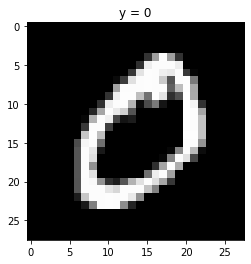

None


In [7]:
print(len(trainset))
#print(trainset[1])
# a tuple of a tensor with the image and its lable
print(trainset[1][0].shape)
print(show_data(trainset[1]))

In [8]:
def get_same_index(target, label):
    label_indices = []

    for i in range(len(target)):
        if target[i] == label:
            label_indices.append(i)

    return label_indices
indices0 = get_same_index(trainset.targets, 0)
trainsample0 = torch.utils.data.sampler.SubsetRandomSampler(indices0)

indices1 = get_same_index(trainset.targets, 1)
trainsample1 = torch.utils.data.sampler.SubsetRandomSampler(indices0)
print(len(trainsample0))
print(len(trainsample1))
#for i in range(0,len(indices1),500):
 #  show_data(trainset[indices1[i]])

5923
5923


In [7]:
class Model1(nn.Module):
    def __init__(self,ind, hd, outd):
        super(Model1, self).__init__()
        self.lin1 = nn.Linear(ind,hd[0])
        self.lin2 = nn.Linear(hd[0],hd[1])
        self.lin3 = nn.Linear(hd[1], outd)
    def forward(self,x):
        x = torch.relu(self.lin1(x))
        x = torch.relu(self.lin2(x))
        x = self.lin3(x)
        return x

In [16]:
ind = 2 * 28 * 28
outd = 2
hd = [128,64]

In [20]:
criterion = nn.CrossEntropyLoss()
model = Model1(ind,hd,outd)
optimizer = torch.optim.SGD(model.parameters(), lr=0.03)


In [32]:
trainloader0 = train_loader = torch.utils.data.DataLoader(
        trainset,
        batch_size=1,
        sampler=trainsample0)

trainloader1 = train_loader = torch.utils.data.DataLoader(
        trainset,
        batch_size=1,
        sampler=trainsample1)

print(len(trainloader0))
print(len(trainloader1))

5923
5923


dataiter = iter(trainloader0)
images, labels = dataiter.next()

print(images.shape)
print(labels)
#for x,y in trainloader0:
this wont work because how will you do for more than one comparison  

In [33]:
i = 0
data = torch.Tensor
while i != 45:
    for x,y in 

SyntaxError: invalid syntax (<ipython-input-33-391dfeed441d>, line 4)

In [44]:
trainset_0 = torch.utils.data.Subset(trainset, indices0)
trainset_1 = torch.utils.data.Subset(trainset, indices1)
comp01 = (len(trainset_0) - 1)/2
print(comp01)
print(len(trainset_0))
print(len(trainset_1))
print(trainset_0[1][0].shape)

2961.0
5923
6742
torch.Size([1, 28, 28])


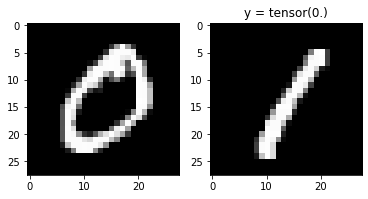

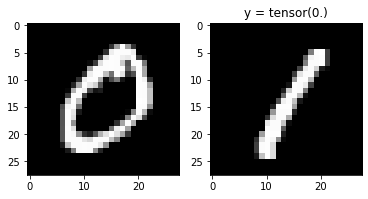

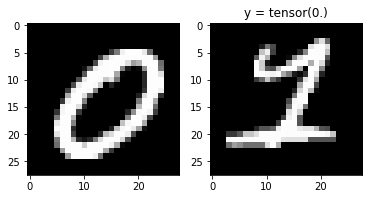

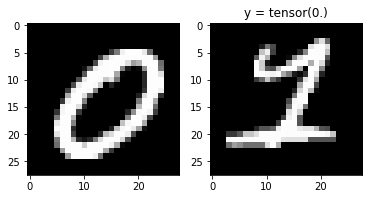

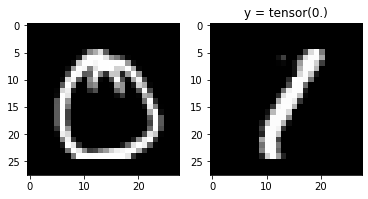

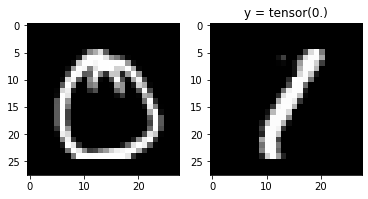

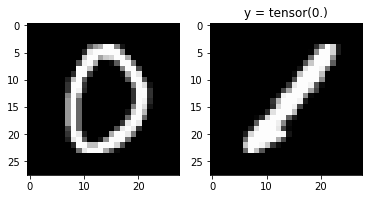

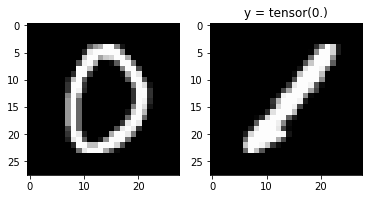

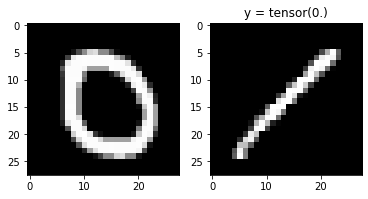

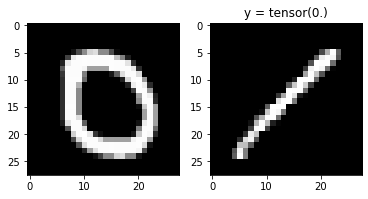

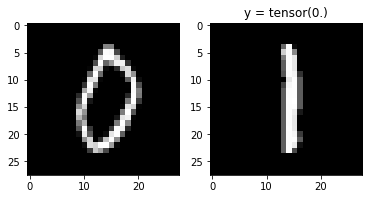

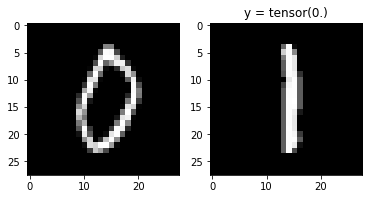

In [91]:
x = torch.zeros([2961,2,28,28], dtype=torch.float32)
y = torch.zeros(x.shape[0])
# 1 for greater, 0 for less
for i in range(int(comp01)):
    x[i][0] = trainset_0[i][0][0]
    x[i][1] = trainset_1[i][0][0]
    y[i] = 0

for i in range(0, int(comp01),500):
    show_data1(x[i],y[i])
    show_data1(x[i],y[i])





In [12]:
indicesv = []
for i in range(5):
    indlist = get_same_index(valset.targets,i)
    indicesv.append(indlist)
len(indicesv[1])

6742

In [ ]:
indicesv = []
for i in range(5):
    indlist = get_same_index(valset.targets,i)
    indicesv.append(indlist)
subsetsv = []
[subsetsv.append(torch.utils.data.Subset(valset, i)) for i in indicesv]
compv = []
for indi in range(len(indicesv) - 1):
    compv.append(int(min(len(subsetsv[indi]), len(subsetsv[indi+1]))))
totv = sum(compv)
print(len(indicesv))
print(subsetsv)
print(compv)

xv = torch.zeros([totv,2,28,28], dtype=torch.float32)
print(xv.shape)
yv = []
# 1 for first pic greater, 0 for first pic less
k = 0
for i in range(len(subsetsv)-1):
    for j in range(int(compv[i]/2)):
        xv[k][0] = subsetsv[i][j][0]
        xv[k][1] = subsetsv[i+1][j][0]
        yv.append(0)
        k+=1
    for j in range(int(compv[i]/2), compv[i]):
        xv[k][1] = subsetsv[i][j][0]
        xv[k][0] = subsetsv[i+1][j][0]
        yv.append(1)
        k+=1

for i in range(0, xv.shape[0],500):
    show_data(xv[i],yv[i])

valsetcomp = Trainsetcomp(xv,yv)
print(valsetcomp[0][0].shape)
print(valsetcomp[0][1])
show_data(valsetcomp[6000][0],valsetcomp[6000][1])
len(valsetcomp)== totv
len(valsetcomp) == len(trainsetcomp)